## Predicting house prices with linear regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
houses_df = pd.read_csv('housing_price_regression.csv')

### Dataset consists of 2051 homes and initially had 80 features (up to 278 from dummy variables)
##### I cleaned the dataset beforehand

In [ ]:
houses_df.head()

In [ ]:
houses_df.shape()
houses_df.to_timestamp()

In [ ]:
houses_df.info()

In [ ]:
houses_df.describe().T

### Target is price

In [ ]:
houses_df['SalePrice']

In [3]:
y = houses_df['SalePrice']
X = houses_df.drop(columns=['SalePrice', 'target'])

### Train/test split - this should technically be done before data cleaning and manipulation!

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Running a simple linear model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
linreg = LinearRegression()

In [8]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
linreg.score(X_train, y_train)

0.9461962541415644

In [10]:
linreg.score(X_test, y_test)

0.9161109817487106

In [11]:
predictions = linreg.predict(X_test)

In [12]:
def adjusted_r_squared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [13]:
adjusted_r_squared(.9161109817487165, 513, 277)

0.817229032575927

#### Generating predictions to compare to actual prices

In [14]:
linreg_results_df = pd.DataFrame(linreg.predict(X_test), y_test).reset_index()

In [15]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [16]:
linreg_results_df.head()

,Actual_Price,Predicted_Price
0,132500,130429.418828
1,226000,214393.707844
2,250000,306450.582455
3,128000,118340.425123
4,203160,203009.737674


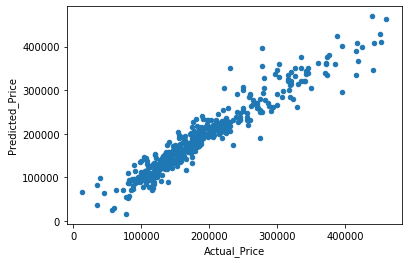

In [18]:
import matplotlib.pyplot as plt
linreg_results_df.plot.scatter('Actual_Price','Predicted_Price')

### But what does the R^2 score really mean to most people (stakeholders, homebuyers, etc?) Let's get some results that can actually be communicated

In [19]:
from sklearn.metrics import mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# RMSE

(mean_squared_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) ** .5)

22695.388224580336

In [21]:
# Mean House Price

linreg_results_df['Actual_Price'].mean()

182692.03118908382

In [22]:
# Average prediction error per house (percentage)

((mean_squared_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) ** .5) /
linreg_results_df['Actual_Price'].mean())

0.12422757619400986

In [23]:
# Median Absolute Error

median_absolute_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price'])

10680.691858153325

In [24]:
#Median House Price

linreg_results_df['Actual_Price'].median()

163000.0

In [25]:
# Average error from median (percentage)

(median_absolute_error(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price']) /
linreg_results_df['Actual_Price'].median())

0.06552571692118604

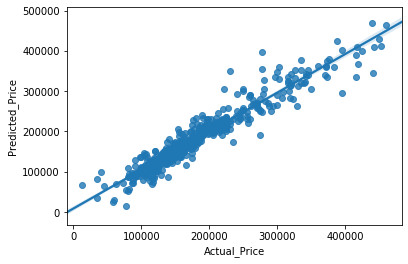

In [26]:
sns.regplot(linreg_results_df['Actual_Price'], linreg_results_df['Predicted_Price'])

### Let's use regularization

In [27]:
from sklearn.linear_model import LassoCV, RidgeCV

### Lasso Regularizer

In [28]:
lasso = LassoCV(cv = 5)

In [29]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [30]:
lasso.score(X_train, y_train)

0.06898444385386371

In [31]:
lasso.score(X_test, y_test)

0.052083604402481054

#### Terrible R^2 - What happened here? We'll fix it later

In [32]:
pd.DataFrame(lasso.coef_, X.columns)

,0
Id,-0.000000
PID,-0.000111
Lot Frontage,0.000000
Lot Area,0.000000
Overall Qual,0.000000
...,...
Sale Type_ConLI,0.000000
Sale Type_ConLw,-0.000000
Sale Type_New,0.000000
Sale Type_Oth,-0.000000


### Ridge Regularizer

In [33]:
ridge = RidgeCV(cv = 5)

In [34]:
ridge.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.61503e-21): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.59328e-21): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40908e-21): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.59702e-21): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [35]:
ridge.score(X_train, y_train)

0.9084024987452084

In [36]:
ridge.score(X_test, y_test)

0.9107831963501043

In [37]:
ridge_pred = ridge.predict(X_test)

In [38]:
median_absolute_error(y_test, ridge_pred)

11512.856606312096

In [ ]:
ridge.coef_

#### This is actually performing worse than our original linear regression model! You don't always need to regularize!

### OK, let's fix our lasso

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss = StandardScaler()

In [41]:
X_train_sc = ss.fit_transform(X_train)

In [42]:
X_test_sc = ss.transform(X_test)

In [43]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [44]:
lasso.score(X_train_sc, y_train)

0.9105517930755569

In [45]:
lasso.score(X_test_sc, y_test)

0.9048054173227886

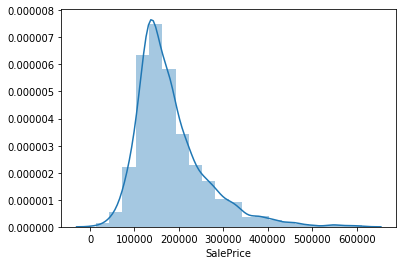

In [49]:
sns.distplot(y, bins=20)

### Let's try logging our target data

In [50]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

#### Lasso

In [51]:
lasso.fit(X_train_sc, y_train_log)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0282153606465414, tolerance: 0.019620355138859034
  tol, rng, random, positive)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [52]:
lasso.score(X_train_sc, y_train_log)

0.9181771628927036

In [53]:
lasso.score(X_test_sc, y_test_log)

0.8877731144679762

In [54]:
(lasso.coef_ == 0).sum()

188

#### Ridge

In [55]:
ridge.fit(X_train_sc, y_train_log)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [56]:
ridge.score(X_train_sc, y_train_log)

0.9488438473906473

In [57]:
ridge.score(X_test_sc, y_test_log)

0.8881469323621634

### Data Pipeline with Sklearn

In [58]:
from sklearn.pipeline import Pipeline

In [62]:
my_pipe = Pipeline(steps=[('ss',StandardScaler()),('ls',LassoCV())])

In [67]:
my_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ls',
                 LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001,
                         fit_intercept=True, max_iter=1000, n_alphas=100,
                         n_jobs=None, normalize=False, positive=False,
                         precompute='auto', random_state=None,
                         selection='cyclic', tol=0.0001, verbose=False))],
         verbose=False)

In [68]:
my_pipe.score(X_test,y_test)

0.9048054173227886

### GridSearchCV

In [81]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = { 'alpha':[0.1,1,5,10]}
ls = GridSearchCV(LinearRegression(), param_grid=param_grid)
ls.fit(X_train,y_train)

ValueError: Invalid parameter alpha for estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .8)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#### No Reg

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, y_train)

In [ ]:
linreg.score(X_train, y_train)

In [ ]:
linreg.score(X_test, y_test)

#### L1 Reg

In [ ]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [ ]:
lasso.fit(X_train_sc, y_train)

In [ ]:
lasso.score(X_train_sc, y_train)

In [ ]:
lasso.score(X_test_sc, y_test)

#### L2 Reg

In [ ]:
ridge.fit(X_train_sc, y_train)

In [ ]:
ridge.score(X_train_sc, y_train)

In [ ]:
ridge.score(X_test_sc, y_test)